In [1]:
#import dkistpkg_ct as DKISTanalysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from matplotlib import animation

import os

# import sunpy.coordinates
# import sunpy.map
# from sunpy.net import Fido
# from sunpy.net import attrs as a

from astropy.io import fits

In [10]:
path = '/Volumes/VBI_External/'
folder_vbi = 'AXXJL'

In [11]:
dir_list = os.listdir(path+folder_vbi)

In [12]:
dir_list.sort()
dir_list.pop(0)
dir_list.pop(0)
dir_list[0]


'VBI_2024_08_08T20_12_32_333333_00656282_I_AXXJL_L1.fits'

In [13]:
img_file = fits.open(path+folder_vbi+'/'+dir_list[0])

In [14]:
img_file

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1092fc3b0>, <astropy.io.fits.hdu.compressed.compressed.CompImageHDU object at 0x12e4c3650>]

In [15]:
np.shape(img_file[1].data)

(1, 4096, 4096)

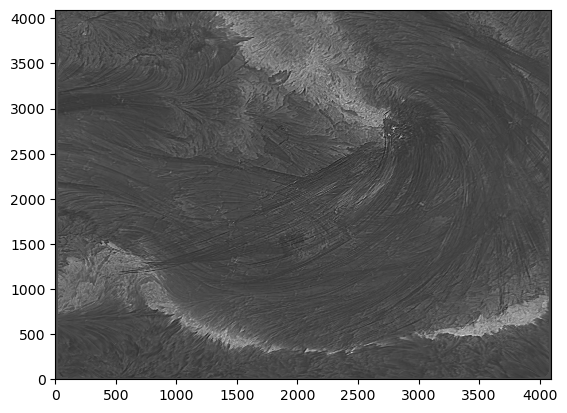

In [16]:
plt.pcolormesh(img_file[1].data[0],cmap='grey')

In [17]:
image = img_file[1].data[0]

In [18]:
len(dir_list)

1186

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x11dd2e200> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

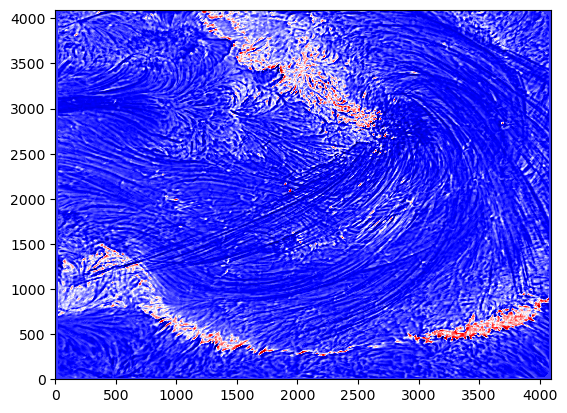

In [19]:
fig, ax = plt.subplots()
cax = ax.pcolormesh(image, cmap='seismic')

def animate(i):
    img_file = fits.open(path+folder_vbi+'/'+dir_list[i])
    image = img_file[1].data[0]
    print(i)
    cax.set_array(image.flatten())

anim = animation.FuncAnimation(fig, animate,frames=len(dir_list)-1)
anim.save('vbi_11Aug.gif')
plt.show()

In [ ]:
fig, ax = plt.subplots()
cax = ax.pcolormesh(image, cmap='grey')

def animate(i):
    img_file = fits.open(path+folder_vbi+'/'+dir_list[i])
    image = img_file[1].data[0]
    print(i)
    cax.set_array(image.flatten())

anim = animation.FuncAnimation(fig, animate,frames=len(dir_list)-1)
anim.save('vbi_11Aug_grey.gif')
plt.show()

In [ ]:
img_file = fits.open(path+folder_vbi+'/'+dir_list[0])
date = img_file[1].header['DATE-BEG']
print(date)

In [ ]:
img_file = fits.open(path+folder_vbi+'/'+dir_list[1])
print(img_file[1].header['DATE-BEG'])

In [ ]:
img_file1 = fits.open(path+folder_vbi+'/'+dir_list[0])
image1 = img_file1[1].data[0]

img_file2 = fits.open(path+folder_vbi+'/'+dir_list[4])
image4 = img_file2[1].data[0]

In [ ]:
image1

In [105]:
diffimg = image4-image1

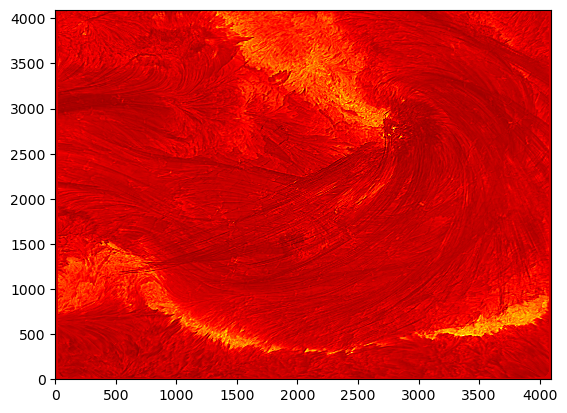

In [142]:
fig, ax = plt.subplots()
cax = ax.pcolormesh(image, cmap='hot')

def animate_mask(i):
    img_file1 = fits.open(path+folder_vbi+'/'+dir_list[i])
    img_file2 = fits.open(path+folder_vbi+'/'+dir_list[i+1])
    image1 = img_file1[1].data[0]
    image2 = img_file2[1].data[0]
    
    c = 1.7
    
    median1 = np.median(image1)
    median2 = np.median(image2)
    
    masklim1 = c*median1
    masklim2 = c*median2
    
    firstmask = np.copy(image1)
    secondmask = np.copy(image2)
    
    firstmask[firstmask < masklim1] = 0
    firstmask[firstmask > masklim1] = 1

    secondmask[secondmask < masklim2] = 0
    secondmask[secondmask > masklim2] = 1
    
    diffimage = np.subtract(secondmask,firstmask)
    print(i)
    cax.set_array(diffimage_mask.flatten())

In [27]:
length

1186

/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_83054/717742200.py:36: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(y_mask,x_mask,.01,c=colors[i],alpha=.9)


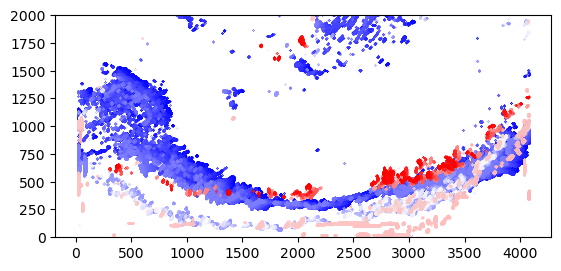

In [48]:

length = len(dir_list)
lengthtest = 1100
colors = plt.cm.bwr(np.linspace(0,1,lengthtest))

fig,ax=plt.subplots()

for i in range(lengthtest):
    img_file1 = fits.open(path+folder_vbi+'/'+dir_list[i])
    img_file2 = fits.open(path+folder_vbi+'/'+dir_list[i+1])
    image1 = img_file1[1].data[0]
    image2 = img_file2[1].data[0]
    
    c = 3
    
    median1 = np.median(image1)
    median2 = np.median(image2)
    
    masklim1 = c*median1
    masklim2 = c*median2
    
    firstmask = np.copy(image1)
    secondmask = np.copy(image2)
    
    firstmask[firstmask < masklim1] = 0
    firstmask[firstmask > masklim1] = 1
    
    secondmask[secondmask < masklim2] = 0
    secondmask[secondmask > masklim2] = 1
    
    diffimage = np.subtract(secondmask,firstmask)

    maskinds = np.where(firstmask > .5)
    x_mask = maskinds[0]
    y_mask = maskinds[1]
    
    ax.scatter(y_mask,x_mask,.01,c=colors[i],alpha=.9)

ax.set_ylim([0,2000])
plt.gca().set_aspect('equal')

In [53]:
img_file2[1].header['DATE-BEG']

'2024-08-08T21:01:25.666666'

/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_83054/1565736346.py:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_mask,y_mask,.1,c=colors[i],alpha=0.01)


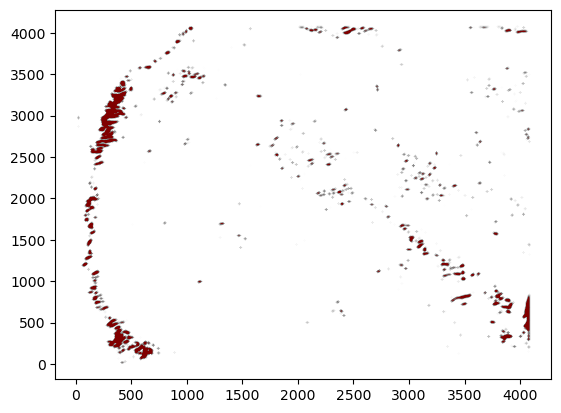

In [25]:
fig,ax=plt.subplots()
ax.scatter(x_mask,y_mask,.1,c=colors[i],alpha=0.01)

In [172]:
len(dir_list)-2

1184

In [164]:
fig.show()

/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_99396/89474557.py:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


In [151]:
len(colors)

1186

In [143]:
anim = animation.FuncAnimation(fig, animate,frames=10)
anim.save('diff_image.gif')
plt.show()

0
0
1
2
3
4
5
6
7
8
9


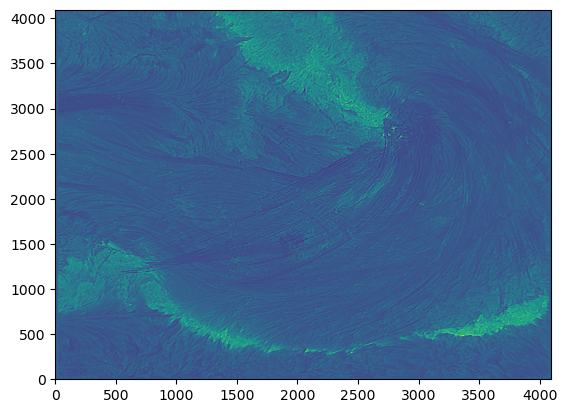

In [112]:
plt.pcolormesh(image1)

In [113]:
np.median(image1)

20511.957

In [20]:
c = 1.7
median = np.median(image1)

masklim = c*median
firstmask = np.copy(image1)
firstmask[firstmask < masklim] = 0
firstmask[firstmask > masklim] = 1
plt.pcolormesh(firstmask,cmap = 'hot')

NameError: name 'image1' is not defined

In [156]:
# light curve?
intensities = []

for i in range(len(dir_list)):
    img_file = fits.open(path+folder_vbi+'/'+dir_list[i])
    image = img_file[1].data[0]

    imageint = np.sum(image)

    intensities.append(imageint)

fig,ax=plt.subplots()
ax.plot(intensities)

OSError: No SIMPLE card found, this file does not appear to be a valid FITS file. If this is really a FITS file, try with ignore_missing_simple=True

In [157]:
i

1185

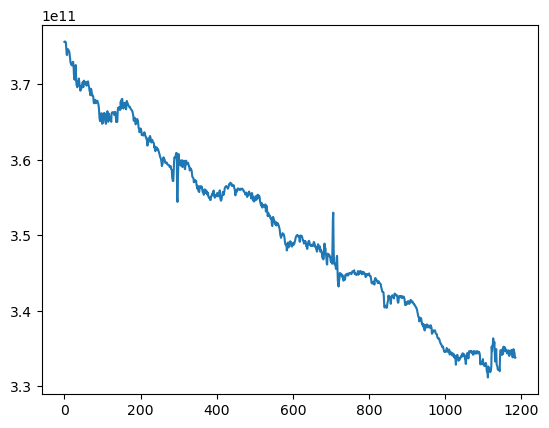

In [158]:
plt.plot(intensities)